In [ ]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

In [ ]:
# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Statmodels
import statsmodels
import statsmodels.api as sm

In [ ]:
aroma = pd.read_csv('/content/Data wine aroma.csv')
aroma.head()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K,Aroma
0,0.005,0.044,1.51,0.122,0.830,0.982,0.387,0.029,1.230,0.561,2.63,128.0,17.30,66.8,80.5,150.0,1130,3.3
1,0.050,0.106,1.25,0.114,0.055,1.270,0.275,0.019,1.050,0.491,6.56,172.0,18.70,15.7,112.0,137.0,1290,4.6
2,0.056,0.146,1.10,0.088,0.643,1.290,0.308,0.035,1.140,0.730,3.05,127.0,15.80,35.4,91.0,161.0,1160,3.9
3,0.077,0.261,1.65,0.073,0.285,0.596,0.078,0.063,0.156,1.020,5.04,94.6,6.34,10.4,54.9,132.0,899,7.1
4,0.011,0.363,1.38,0.160,0.051,1.320,0.380,0.059,1.130,1.730,3.07,138.0,16.70,76.6,84.6,164.0,1090,5.6


In [ ]:
house = pd.read_csv('/content/house_prices.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
aroma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd      41 non-null     float64
 1   Mo      41 non-null     float64
 2   Mn      41 non-null     float64
 3   Ni      41 non-null     float64
 4   Cu      41 non-null     float64
 5   Al      41 non-null     float64
 6   Ba      41 non-null     float64
 7   Cr      41 non-null     float64
 8   Sr      41 non-null     float64
 9   Pb      41 non-null     float64
 10  B       41 non-null     float64
 11  Mg      41 non-null     float64
 12  Si      41 non-null     float64
 13  Na      41 non-null     float64
 14  Ca      41 non-null     float64
 15  P       41 non-null     float64
 16  K       41 non-null     int64  
 17  Aroma   41 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 5.9 KB


In [ ]:
aroma.describe().T

,count,mean,std,min,25%,50%,75%,max
Cd,41.0,0.053805,0.023502,0.005,0.039,0.058,0.067,0.106
Mo,41.0,0.177366,0.095534,0.009,0.126,0.166,0.234,0.479
Mn,41.0,1.646220,0.601835,0.906,1.250,1.610,1.760,4.080
Ni,41.0,0.102024,0.082417,0.041,0.061,0.073,0.112,0.466
Cu,41.0,0.170610,0.188871,0.038,0.058,0.099,0.171,0.830
Al,41.0,0.925317,0.470496,0.308,0.596,0.811,1.210,2.070
Ba,41.0,0.216293,0.106508,0.070,0.105,0.225,0.299,0.408
Cr,41.0,0.042390,0.018888,0.006,0.028,0.038,0.053,0.100
Sr,41.0,0.800512,0.445945,0.156,0.360,0.898,1.120,2.140
Pb,41.0,0.864146,0.458837,0.025,0.561,0.777,1.190,2.060


In [ ]:
aroma.describe()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K,Aroma
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.053805,0.177366,1.646220,0.102024,0.170610,0.925317,0.216293,0.042390,0.800512,0.864146,4.820000,124.107317,14.318537,39.013659,76.502439,153.817073,1099.536585,4.924390
std,0.023502,0.095534,0.601835,0.082417,0.188871,0.470496,0.106508,0.018888,0.445945,0.458837,1.614542,29.912200,8.603771,29.603790,18.622882,28.261369,193.709589,1.023177
min,0.005000,0.009000,0.906000,0.041000,0.038000,0.308000,0.070000,0.006000,0.156000,0.025000,2.000000,75.900000,4.570000,7.250000,44.900000,81.900000,810.000000,3.300000
25%,0.039000,0.126000,1.250000,0.061000,0.058000,0.596000,0.105000,0.028000,0.360000,0.561000,3.370000,99.300000,7.620000,12.500000,64.400000,133.000000,976.000000,4.300000
50%,0.058000,0.166000,1.610000,0.073000,0.099000,0.811000,0.225000,0.038000,0.898000,0.777000,4.570000,125.000000,13.400000,35.400000,70.600000,156.000000,1090.000000,5.000000
75%,0.067000,0.234000,1.760000,0.112000,0.171000,1.210000,0.299000,0.053000,1.120000,1.190000,6.210000,143.000000,17.800000,55.200000,85.900000,172.000000,1200.000000,5.500000
max,0.106000,0.479000,4.080000,0.466000,0.830000,2.070000,0.408000,0.100000,2.140000,2.060000,8.110000,199.000000,43.600000,125.000000,128.000000,218.000000,1810.000000,7.700000


In [ ]:
aroma.isnull().sum()

,0
Cd,0
Mo,0
Mn,0
Ni,0
Cu,0
Al,0
Ba,0
Cr,0
Sr,0
Pb,0


In [ ]:
house.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
duplicated = aroma[aroma.duplicated()]
duplicated

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K,Aroma
20,0.061,0.245,1.61,0.070,0.172,2.070,0.071,0.053,0.186,1.19,4.42,87.6,7.62,11.6,70.6,156.0,820,5.5
33,0.065,0.211,1.65,0.102,0.055,0.308,0.206,0.028,0.720,1.02,6.12,99.3,27.10,20.5,95.2,194.0,1260,5.1
37,0.039,0.071,1.19,0.043,0.163,0.971,0.105,0.028,0.491,0.31,6.56,103.0,9.47,45.3,67.9,133.0,1090,5.1


In [ ]:
aroma.shape

(41, 18)

In [ ]:
aroma.columns

Index(['Cd', 'Mo', 'Mn', 'Ni', 'Cu', 'Al', 'Ba', 'Cr', 'Sr', 'Pb', 'B', 'Mg',
       'Si', 'Na', 'Ca', 'P', 'K', 'Aroma'],
      dtype='object')

In [ ]:
x = aroma.drop(columns = "Aroma")
y = aroma["Aroma"]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
lr = LinearRegression()
lr.fit(x,y)
y_hat = lr.predict(x)
print('MSE:', mean_squared_error(y, y_hat))
print('R-square:', r2_score(y, y_hat))

MSE: 0.1660753383611435
R-square: 0.837397260303406


In [ ]:
aroma.shape

(41, 18)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((32, 17), (9, 17))

In [ ]:
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_hat))
print('R-square :', r2_score(y_test, y_hat))

MSE : 0.8101511469669519
R-square : 0.15238642593227714


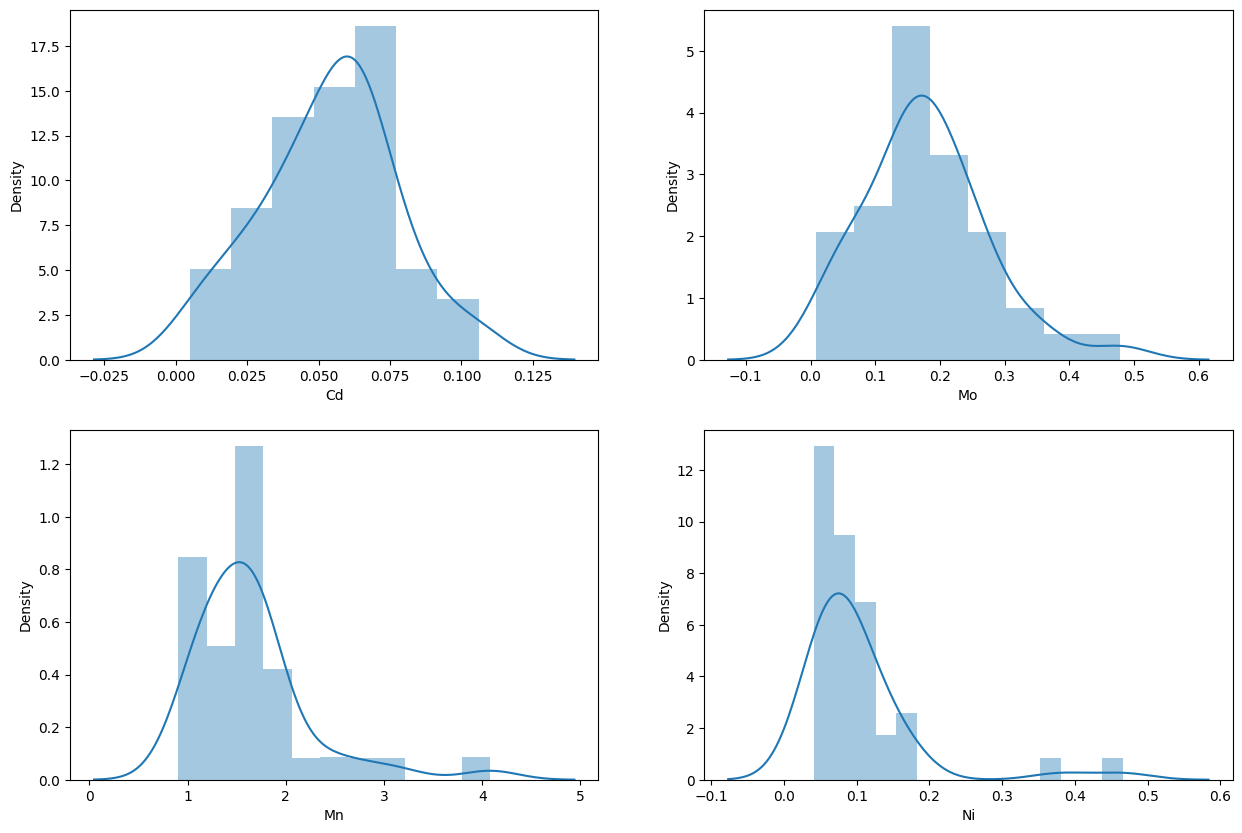

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(aroma["Cd"], ax=axes[0, 0])
sns.distplot(aroma["Mo"], ax=axes[0, 1])
sns.distplot(aroma["Mn"], ax=axes[1, 0])
sns.distplot(aroma["Ni  "], ax=axes[1, 1])
plt.show()

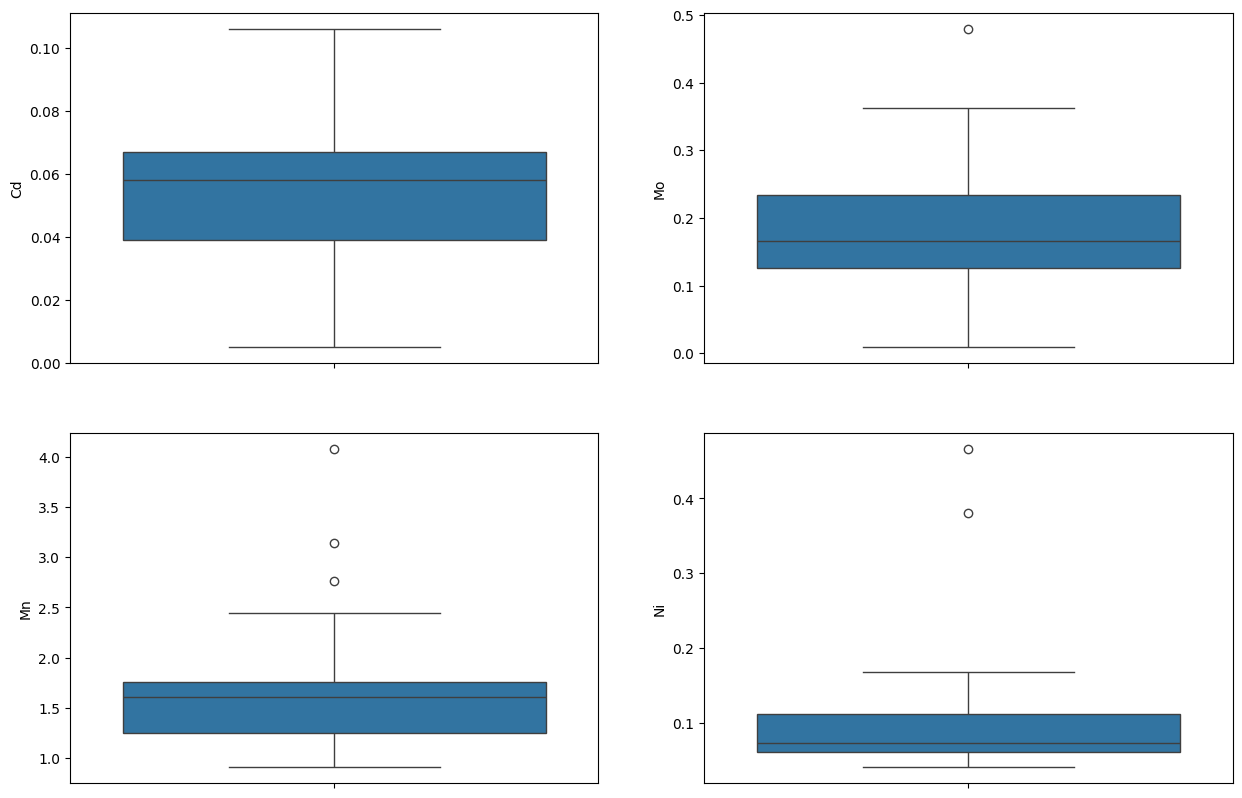

In [ ]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(aroma["Cd"], ax=axes[0, 0])
sns.boxplot(aroma["Mo"], ax=axes[0, 1])
sns.boxplot(aroma["Mn"], ax=axes[1, 0])
sns.boxplot(aroma["Ni"], ax=axes[1, 1])
plt.show()

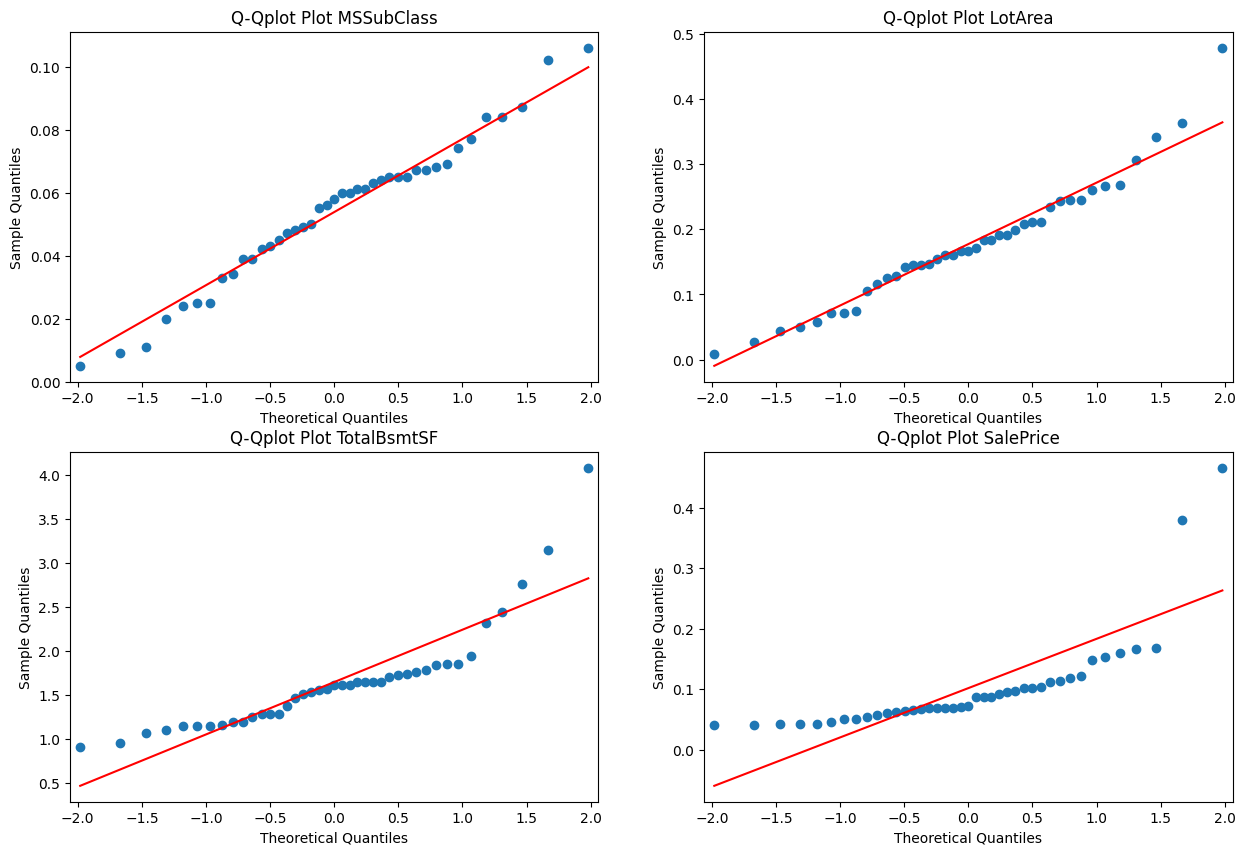

In [ ]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(aroma["Cd"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot MSSubClass')

sm.graphics.qqplot(aroma["Mo"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot LotArea')

sm.graphics.qqplot(aroma["Mn"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot TotalBsmtSF')

sm.graphics.qqplot(aroma["Ni"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot SalePrice')

plt.show()

In [ ]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = aroma.columns

for i in column:
  stat, p = shapiro(aroma[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.980, p=0.685
Gagal Tolak H0, Cd berdistribusi normal
Statistics=0.961, p=0.170
Gagal Tolak H0, Mo berdistribusi normal
Statistics=0.799, p=0.000
Tolak H0, Mn tidak berdistribusi normal
Statistics=0.621, p=0.000
Tolak H0, Ni tidak berdistribusi normal
Statistics=0.640, p=0.000
Tolak H0, Cu tidak berdistribusi normal
Statistics=0.909, p=0.003
Tolak H0, Al tidak berdistribusi normal
Statistics=0.919, p=0.006
Tolak H0, Ba tidak berdistribusi normal
Statistics=0.948, p=0.061
Gagal Tolak H0, Cr berdistribusi normal
Statistics=0.908, p=0.003
Tolak H0, Sr tidak berdistribusi normal
Statistics=0.975, p=0.486
Gagal Tolak H0, Pb berdistribusi normal
Statistics=0.960, p=0.153
Gagal Tolak H0, B berdistribusi normal
Statistics=0.959, p=0.141
Gagal Tolak H0, Mg berdistribusi normal
Statistics=0.850, p=0.000
Tolak H0, Si tidak berdistribusi normal
Statistics=0.883, p=0.001
Tolak H0, Na tidak berdistribusi normal
Statistics=0.949, p=0.062
Gagal Tolak H0, Ca berdistribusi normal
Statistics=

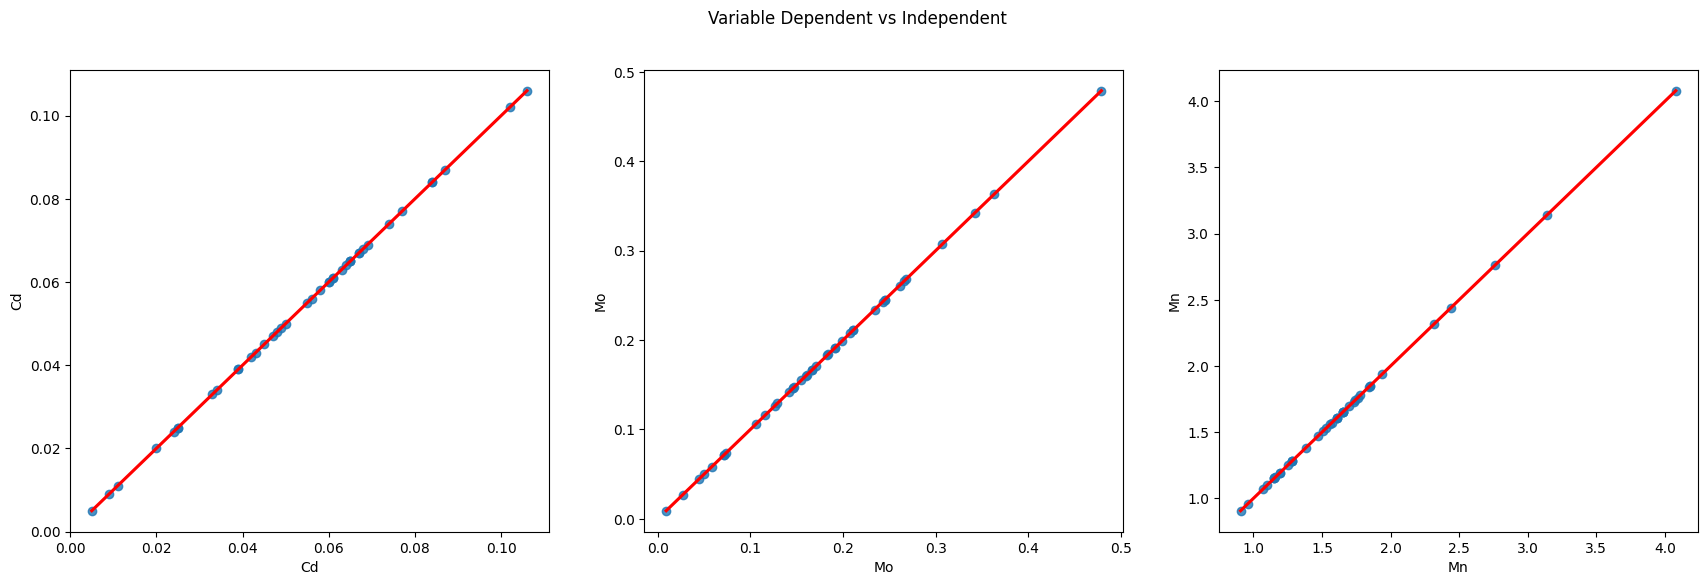

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=aroma["Cd"], y=aroma["Cd"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=aroma["Mo"], y=aroma["Mo"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=aroma["Mn"], y=aroma["Mn"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

<Axes: >

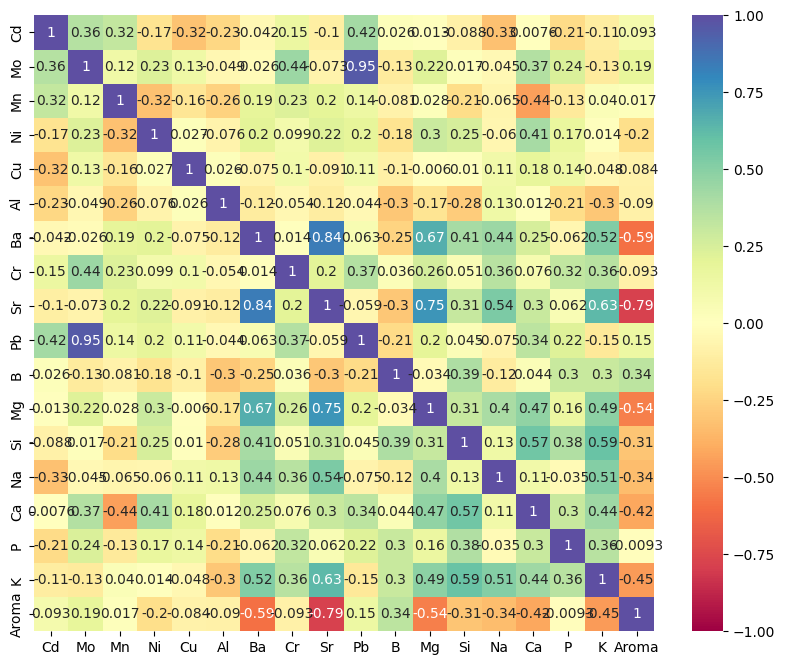

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(aroma.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)